In [19]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [20]:
df = pd.read_csv('./data/retailmax.csv')

In [21]:
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [22]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [23]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

In [24]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

In [25]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

In [26]:
df['Cluster'] = clusters

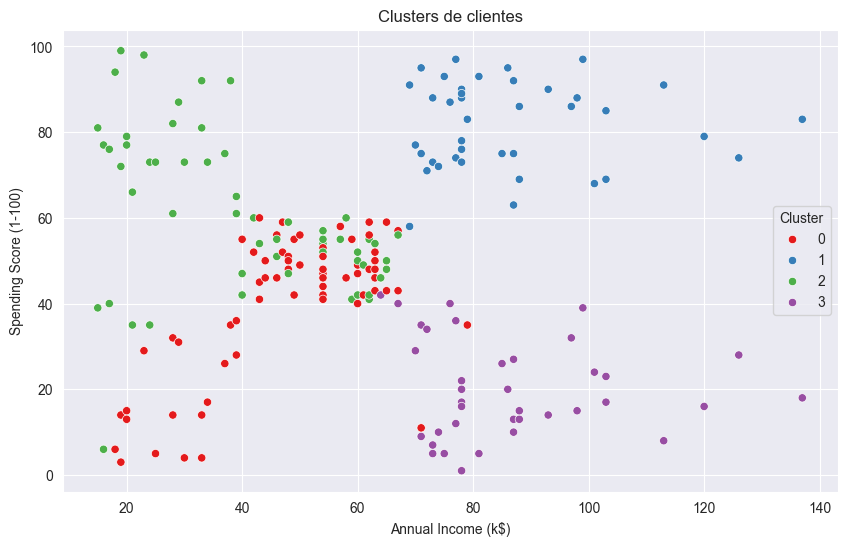

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='Set1'
)
plt.title('Clusters de clientes')
plt.show()

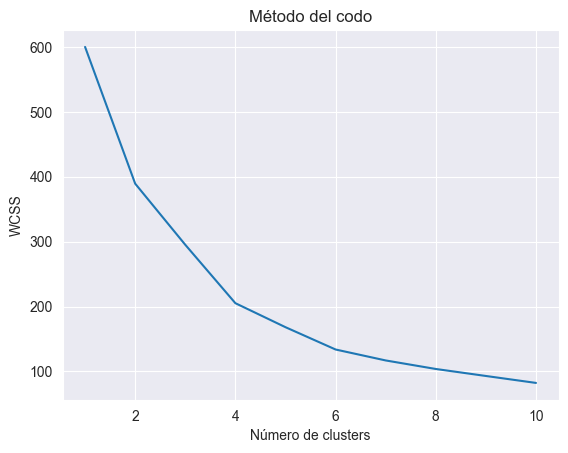

In [28]:
def calcular_wcss(datos):
    wcss = []
    for n in range(1, 11):
        kmeans = KMeans(
            n_clusters=n,
            init='k-means++',
            max_iter=300,
            n_init=10,
            random_state=42
        )
        kmeans.fit(datos)
        wcss.append(kmeans.inertia_)
    return wcss

wcss = calcular_wcss(scaled_features)

plt.plot(range(1, 11), wcss)
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()


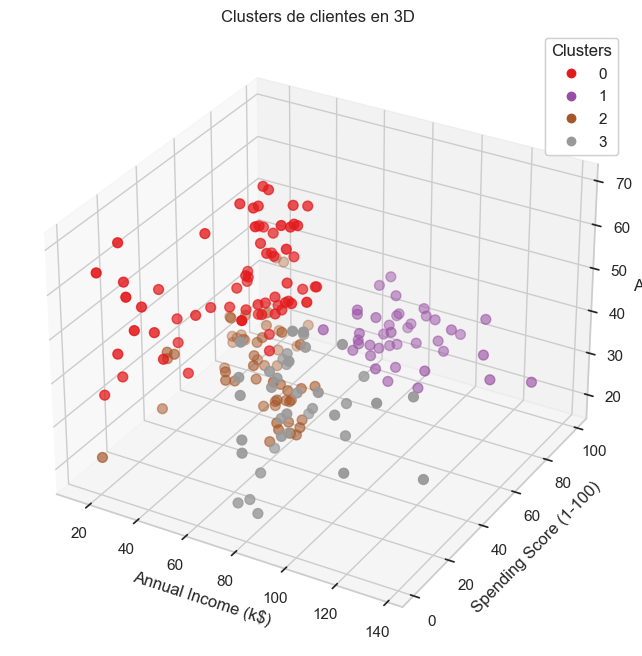

In [29]:
sns.set(style="whitegrid")

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df['Annual Income (k$)'],
    df['Spending Score (1-100)'],
    df['Age'],
    c=df['Cluster'],
    cmap='Set1',
    s=50
)

ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Age')
ax.set_title('Clusters de clientes en 3D')

legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()

In [30]:
cluster_analysis = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']] \
                    .groupby('Cluster').mean()

cluster_analysis

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,53.984615,47.707692,39.969231
1,32.875000,86.100000,81.525000
2,25.438596,40.000000,60.298246
3,39.368421,86.500000,19.578947


In [31]:
for cluster in cluster_analysis.index:
    print(f"Cluster {cluster}:")
    print(f" - Edad media: {cluster_analysis['Age'][cluster]:.2f}")
    print(f" - Ingreso anual medio: {cluster_analysis['Annual Income (k$)'][cluster]:.2f}k$")
    print(f" - Spending Score medio: {cluster_analysis['Spending Score (1-100)'][cluster]:.2f}")
    print("===========================================")

Cluster 0:
 - Edad media: 53.98
 - Ingreso anual medio: 47.71k$
 - Spending Score medio: 39.97
Cluster 1:
 - Edad media: 32.88
 - Ingreso anual medio: 86.10k$
 - Spending Score medio: 81.53
Cluster 2:
 - Edad media: 25.44
 - Ingreso anual medio: 40.00k$
 - Spending Score medio: 60.30
Cluster 3:
 - Edad media: 39.37
 - Ingreso anual medio: 86.50k$
 - Spending Score medio: 19.58


In [32]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

extended_features = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaled_extended_features = scaler.fit_transform(extended_features)

kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters_extended = kmeans.fit_predict(scaled_extended_features)

df['Cluster'] = clusters_extended

In [33]:
extended_cluster_analysis = df[['Gender','Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']] \
                              .groupby('Cluster').mean()

extended_cluster_analysis

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,0.538462,32.692308,86.538462,82.128205
1,0.551724,36.482759,89.517241,18.000000
2,1.000000,49.813953,49.232558,40.069767
3,0.592593,24.907407,39.722222,61.203704
4,0.000000,55.714286,53.685714,36.771429


In [35]:
for cluster in extended_cluster_analysis.index:
    gender_mean = extended_cluster_analysis['Gender'][cluster]
    age_mean = extended_cluster_analysis['Age'][cluster]
    income_mean = extended_cluster_analysis['Annual Income (k$)'][cluster]
    score_mean = extended_cluster_analysis['Spending Score (1-100)'][cluster]

    print(f"Cluster {cluster}:")
    print(f" - Edad promedio: {age_mean:.2f}")
    print(f" - Ingreso anual promedio: {income_mean:.2f}k$")
    print(f" - Calificación RetailMax promedio: {score_mean:.2f}")
    print(f" - % mujeres: {gender_mean * 100:.2f}%")
    print("================================")

Cluster 0:
 - Edad promedio: 32.69
 - Ingreso anual promedio: 86.54k$
 - Calificación RetailMax promedio: 82.13
 - % mujeres: 53.85%
Cluster 1:
 - Edad promedio: 36.48
 - Ingreso anual promedio: 89.52k$
 - Calificación RetailMax promedio: 18.00
 - % mujeres: 55.17%
Cluster 2:
 - Edad promedio: 49.81
 - Ingreso anual promedio: 49.23k$
 - Calificación RetailMax promedio: 40.07
 - % mujeres: 100.00%
Cluster 3:
 - Edad promedio: 24.91
 - Ingreso anual promedio: 39.72k$
 - Calificación RetailMax promedio: 61.20
 - % mujeres: 59.26%
Cluster 4:
 - Edad promedio: 55.71
 - Ingreso anual promedio: 53.69k$
 - Calificación RetailMax promedio: 36.77
 - % mujeres: 0.00%
